In [3]:
# !pip install rasterio
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

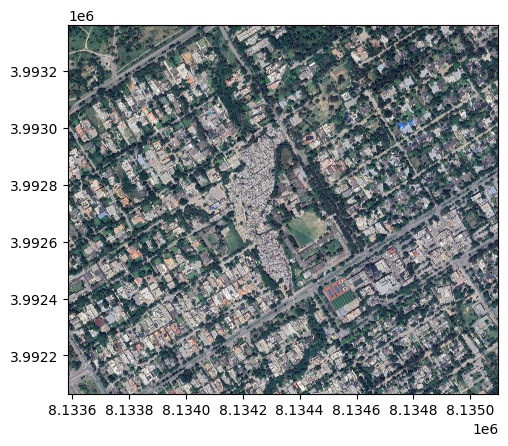

<Axes: >

In [4]:
img = rasterio.open('ChristianColony.tif')
show(img)

(4, 8665, 10087)


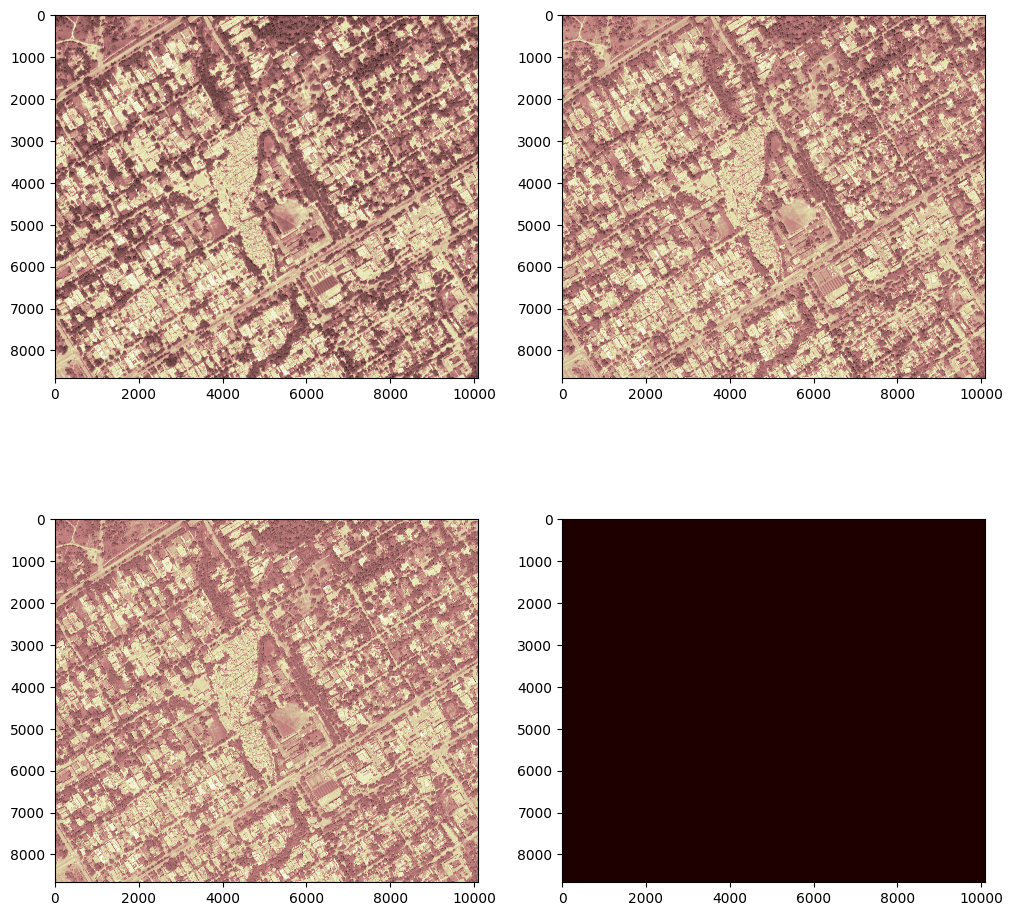

In [5]:
full_img = img.read()
num_bands = img.count
print(full_img.shape)

img_band1 = img.read(1)
img_band2 = img.read(2)
img_band3 = img.read(3)
img_band4 = img.read(4)

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2, 2, 1)
plt.imshow(img_band1, cmap='pink')
fig.add_subplot(2, 2, 2)
plt.imshow(img_band2, cmap='pink')
fig.add_subplot(2, 2, 3)
plt.imshow(img_band3, cmap='pink')
fig.add_subplot(2, 2, 4)
plt.imshow(img_band4, cmap='pink')
plt.show()





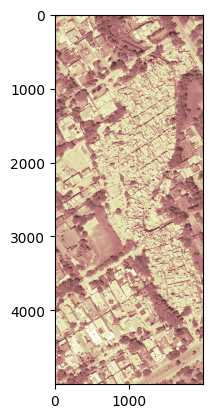

In [6]:
clipped_image = full_img[:-1,2000:7000,3200:5200]
plt.imshow(clipped_image[1], cmap='pink')
plt.show()

The image metadata is: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10087, 'height': 8665, 'count': 4, 'crs': CRS.from_epsg(3857), 'transform': Affine(0.14999981163876747, 0.0, 8133585.9966,
       0.0, -0.15000848240045475, 3993363.6639)}


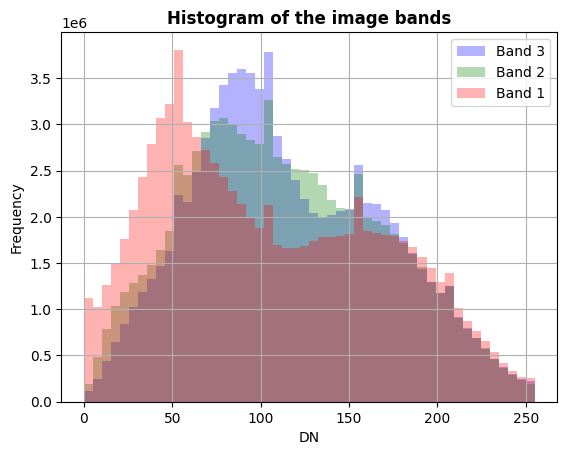

In [7]:
print(f'The image metadata is: {img.meta}')
rasterio.plot.show_hist(full_img[:-1,:,:], bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram of the image bands",label=['Band 1','Band 2','Band 3'])


In [16]:
import os
from rasterio.windows import Window
from PIL import Image

# Define the input GeoTIFF file path
input_geotiff_path = 'ChristianColony.tif'

# Define the output directory for the JPG tiles
output_dir = 'C:/Users/raphael khalid/Desktop/Slums/November Capstone/dataset/tiles'

# Define the tile dimensions (width and height)
tile_width = 800
tile_height = 800
#2000:7000,3200:5200
# Define the input GeoTIFF file path
input_geotiff_path = 'ChristianColony.tif'

# Define the output directory for the JPG tiles
output_dir = 'C:/Users/raphael khalid/Desktop/Slums/November Capstone/dataset/tiles'

# Define the tile dimensions (width and height)
tile_width = 800
tile_height = 800

# Open the GeoTIFF file
with rasterio.open(input_geotiff_path) as img:
    # Define the window for cropping (adjust the coordinates as needed)
    window = Window(3200, 2000, 2000,5000)  # Example window coordinates

    # Read the data for the clipped portion
    clipped_data = img.read(window=window)

    # Iterate through the clipped data and create tiles
    for i in range(clipped_data.shape[2] // tile_width):
        for j in range(clipped_data.shape[1] // tile_height):
            # Calculate the window for the current tile
            tile_window = Window(
                col_off=i * tile_width,
                row_off=j * tile_height,
                width=min(tile_width, clipped_data.shape[2] - i * tile_width),
                height=min(tile_height, clipped_data.shape[1] - j * tile_height)
            )

            # Extract the data for the tile
            tile_data = clipped_data[:, tile_window.row_off:tile_window.row_off + tile_window.height,
                                      tile_window.col_off:tile_window.col_off + tile_window.width]

            # Create a PIL image from the data
            image = Image.fromarray(tile_data.transpose(1, 2, 0))

            # Convert the image to RGB mode if it's in RGBA mode
            if image.mode == 'RGBA':
                image = image.convert('RGB')

            # Determine the output file name (you can change this as per your naming convention)
            output_file = os.path.join(output_dir, f'tile_{i}_{j}.jpg')

            # Save the tile as a JPG image
            image.save(output_file, 'JPEG')

print("Tiles created and saved as JPG images.")


Tiles created and saved as JPG images.


In [35]:
# Save JPG of entire image
from PIL import Image
clipped_image = full_img[:-1,2000:7000,3200:5200]
# Create a PIL image from the data
image = Image.fromarray(clipped_image.transpose(1, 2, 0))

# Convert the image to RGB mode if it's in RGBA mode
if image.mode == 'RGBA':
    image = image.convert('RGB')

# Determine the output file name (you can change this as per your naming convention)
output_file = os.path.join(output_dir, f'clipped_image.jpg')

# Save the tile as a JPG image
image.save(output_file, 'JPEG')

print("Clipped image saved as JPG image.")


Clipped image saved as JPG image.
